In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 設定 Pandas 顯示選項 (避免欄位被 ... 隱藏)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format) # 浮點數只顯示兩位

In [23]:
import pandas as pd
import numpy as np

# 讀取 CSV (遇到亂碼時嘗試 encoding)
df = pd.read_csv('Customer-Churn-Records.csv', encoding='utf-8') 

In [24]:
# 基本體檢
print(df.shape)          # (列數, 欄數) - 確認資料量級
print(df.columns)        # 查看所有欄位名稱
print(df.head())         # 看前 5 筆資料長相
print(df.info())         # 檢查資料型態 (Dtype) 和是否有缺值 (Non-Null)

# 數值統計 (檢查是否有怪異的極大/極小值)
print(df.describe())     

# 🕵️‍♀️ 類別偵查 (抓出 'Male', 'male ', 'M' 這種不一致)
# dropna=False 會連 NaN 一起顯示，非常重要！
# print(df['Cust_ID'].value_counts(dropna=False))

(10000, 18)
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned'], dtype='object')
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  Point Earned
0          1    15634602  Hargrave          619    France  Female   42       2      0.00              1          1               1        101348.88       1         1                   2   DIAMOND           464
1          2    15647311      Hill          608     Spain  Female   41       1  83807.86              1          0               1        112542.58       0         1                   3   DIAMOND           456
2          3    15619304      Onio          502    France  Female   42       8 159660.80  

In [25]:
print(df.isna().sum())

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


In [26]:
import pandas as pd

# 1. 檢查缺失值 (Missing Values)
# 邏輯：isnull() 會把空格標記為 True，sum() 把它們加總起來
print("=== 🛑 缺失值檢查 (Missing Values) ===")
print(df.isnull().sum()) 
# 如果印出來全是 0，恭喜你，資料很乾淨！

print("\n" + "="*30 + "\n")

# 2. 檢查資料型態與資訊
# 邏輯：這行最重要，它會告訴你每個欄位是 int(整數), float(浮點數) 還是 object(文字)
print("=== ℹ️ 資料型態總覽 (Data Info) ===")
df.info()

print("\n" + "="*30 + "\n")

# 3. 專門抓出「類別型 (Object)」欄位來看看
# 邏輯：找出所有屬性是 'object' 的欄位，看看裡面都寫些什麼 (例如國家、性別)
cat_cols = df.select_dtypes(include=['object']).columns
print(f"🔍 發現類別型欄位 (需要處理): {list(cat_cols)}")

for col in cat_cols:
    print(f"\n--- 欄位: {col} 的內容分佈 ---")
    print(df[col].value_counts())

=== 🛑 缺失值檢查 (Missing Values) ===
RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


=== ℹ️ 資料型態總覽 (Data Info) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null

In [27]:
# 刪除對模型無用的欄位
# axis=1 代表我們要刪除的是「直的欄位 (Columns)」
df_clean = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

print("刪除後的欄位：", df_clean.columns)

刪除後的欄位： Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned'], dtype='object')


In [28]:
# 針對 Geography 和 Gender 進行 One-Hot Encoding
# columns 參數指定要轉換的欄位，沒被指定的數值欄位會自動保留
df_encoded = pd.get_dummies(df_clean, columns=['Geography', 'Gender','Card Type'],dtype=int)


# 讓我們看看變身後的資料長怎樣
print(df_encoded.head())

   CreditScore  Age  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  Satisfaction Score  Point Earned  Geography_France  Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  Card Type_DIAMOND  Card Type_GOLD  Card Type_PLATINUM  Card Type_SILVER
0          619   42       2      0.00              1          1               1        101348.88       1         1                   2           464                 1                  0                0              1            0                  1               0                   0                 0
1          608   41       1  83807.86              1          0               1        112542.58       0         1                   3           456                 0                  0                1              1            0                  1               0                   0                 0
2          502   42       8 159660.80              3          1               0        1

In [29]:
# 記得要用 df_encoded (這才是全數字的乾淨表格)
X = df_encoded.drop(columns=['Exited'])
y = df_encoded['Exited']

# 檢查一下 X 的樣子，應該要全部都是數字了
print(X.head())

   CreditScore  Age  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Complain  Satisfaction Score  Point Earned  Geography_France  Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  Card Type_DIAMOND  Card Type_GOLD  Card Type_PLATINUM  Card Type_SILVER
0          619   42       2      0.00              1          1               1        101348.88         1                   2           464                 1                  0                0              1            0                  1               0                   0                 0
1          608   41       1  83807.86              1          0               1        112542.58         1                   3           456                 0                  0                1              1            0                  1               0                   0                 0
2          502   42       8 159660.80              3          1               0        113931.57         1      

In [30]:
from sklearn.model_selection import train_test_split

# 這裡用到我們上次學的 stratify=y，這對銀行流失預測(不平衡資料)超級重要！
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# 確認一下切出來的大小對不對
print(f"訓練集形狀: {X_train.shape}")
print(f"測試集形狀: {X_test.shape}")

訓練集形狀: (8000, 20)
測試集形狀: (2000, 20)


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. 建立模型 (召集 100 位審查員)
# n_estimators=100 代表有 100 棵樹
# random_state=42 確保每次開會的結果都一樣(方便重現)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. 訓練模型 (Training) - 把 8000 筆資料丟進去給他們讀書
print("🚀 模型開始訓練中... (召開審查委員會)")
rf_model.fit(X_train, y_train)
print("✅ 訓練完成！")

# 3. 考試 (Testing) - 用剩下的 2000 筆來測試
# 讓模型預測這 2000 人會不會流失
y_pred = rf_model.predict(X_test)

# 4. 驗收成果
acc = accuracy_score(y_test, y_pred)
print(f"\n🏆 模型準確率 (Accuracy): {acc:.2%}")

# 5. 詳細成績單 (這才是專業分析師要看的)
print("\n📋 分類報告 (Classification Report):")
print(classification_report(y_test, y_pred))

🚀 模型開始訓練中... (召開審查委員會)
✅ 訓練完成！

🏆 模型準確率 (Accuracy): 99.85%

📋 分類報告 (Classification Report):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



=== 🔍 誰是洩題者？(特徵重要性排行) ===
              Feature  Importance
8            Complain        0.80
1                 Age        0.07
4       NumOfProducts        0.05
3             Balance        0.02
6      IsActiveMember        0.01
12  Geography_Germany        0.01
0         CreditScore        0.01
7     EstimatedSalary        0.01
10       Point Earned        0.01
2              Tenure        0.01


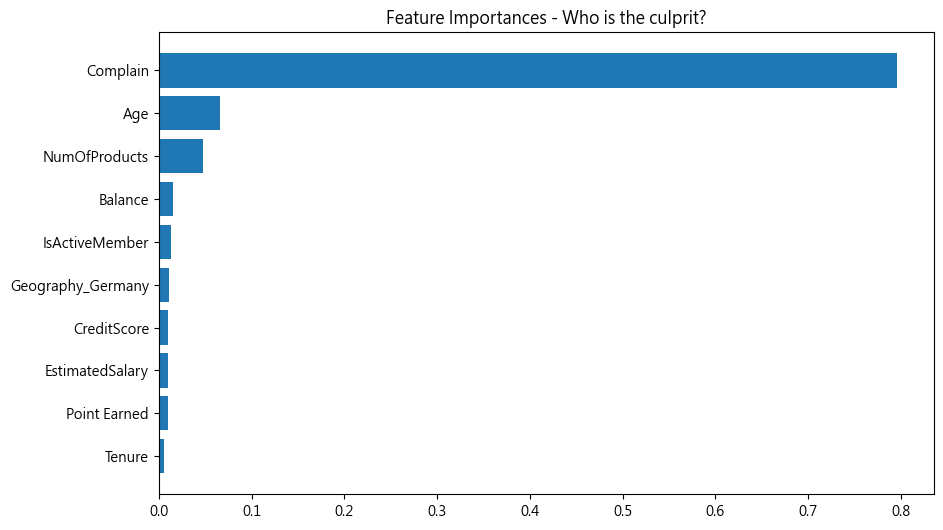

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# 1. 設定中文字型：指定使用 'Microsoft JhengHei' (微軟正黑體)
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 

# 2. 修正負號顯示問題：
# 設定了中文字型後，負號 '-' 有時候會變成方塊，這行把它修好
plt.rcParams['axes.unicode_minus'] = False 

# 1. 取得特徵重要性數值
importances = rf_model.feature_importances_

# 2. 把特徵名稱跟數值對應起來，並排序
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 3. 印出前 5 名最重要的特徵
print("=== 🔍 誰是洩題者？(特徵重要性排行) ===")
print(feature_importance_df.head(10))

# 4. 畫圖讓你更有感
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.gca().invert_yaxis() # 讓第一名排上面
plt.title('Feature Importances - Who is the culprit?')
plt.show()

In [33]:
# 從 X 中移除 'Complain'
# 注意：我們要同時移除 'Exited' (答案) 和 'Complain' (洩題者)
X = df_encoded.drop(columns=['Exited', 'Complain'])
y = df_encoded['Exited']

print("修正後的 X 欄位數:", X.shape[1])
# 應該會比原本少 1 欄

修正後的 X 欄位數: 19


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

In [35]:
# 重新建立與訓練隨機森林
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 再次考試
y_pred = rf_model.predict(X_test)

# 看看真實的成績
acc = accuracy_score(y_test, y_pred)
print(f"\n🏆 真實準確率 (Accuracy): {acc:.2%}")

print("\n📋 真實分類報告:")
print(classification_report(y_test, y_pred))


🏆 真實準確率 (Accuracy): 86.95%

📋 真實分類報告:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1592
           1       0.81      0.47      0.60       408

    accuracy                           0.87      2000
   macro avg       0.84      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [36]:
# 修改模型參數：加入 class_weight='balanced'
# 這會告訴模型：數量少的類別(流失客)比較重要，請多花點心思學
rf_model_balanced = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    class_weight='balanced'  # <--- 關鍵修改在這裡
)

# 重新訓練
rf_model_balanced.fit(X_train, y_train)

# 重新考試
y_pred_balanced = rf_model_balanced.predict(X_test)

# 看看 Recall 有沒有進步
print("=== ⚖️ 平衡權重後的表現 ===")
print(classification_report(y_test, y_pred_balanced))

=== ⚖️ 平衡權重後的表現 ===
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1592
           1       0.80      0.45      0.58       408

    accuracy                           0.86      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000




=== 🔍 真實的流失主因 (Top 5) ===
           Feature  Importance
1              Age        0.22
4    NumOfProducts        0.12
3          Balance        0.11
7  EstimatedSalary        0.10
9     Point Earned        0.10


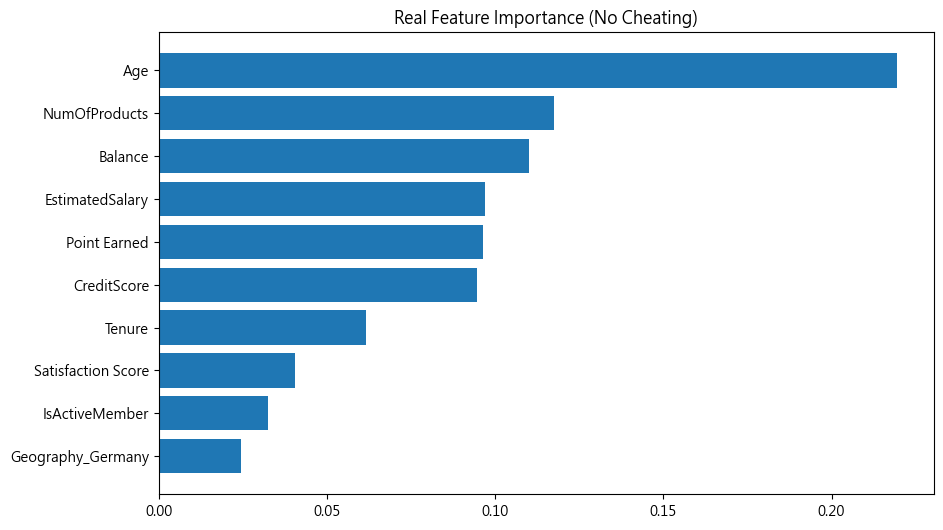

In [37]:
# 查看新的特徵重要性
importances = rf_model_balanced.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n=== 🔍 真實的流失主因 (Top 5) ===")
print(feature_importance_df.head(5))

# 畫圖
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.gca().invert_yaxis()
plt.title('Real Feature Importance (No Cheating)')
plt.show()

=== ⚡️ 調整門檻為 30.0% 後的表現 ===
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1592
           1       0.60      0.69      0.64       408

    accuracy                           0.84      2000
   macro avg       0.76      0.79      0.77      2000
weighted avg       0.85      0.84      0.85      2000



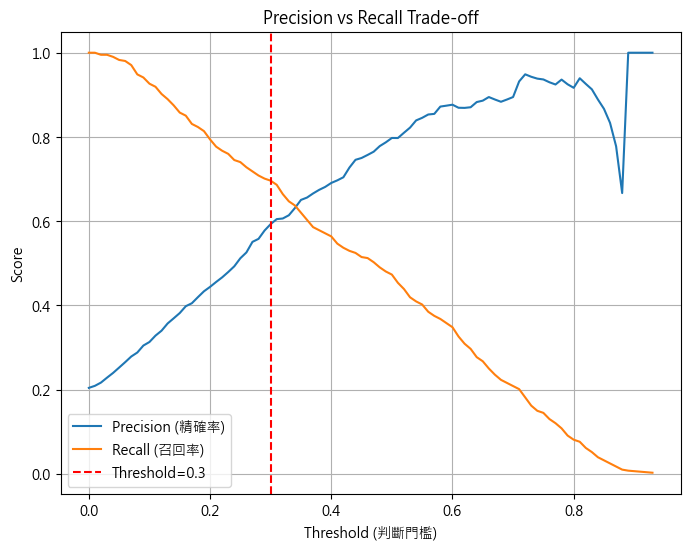

In [38]:
from sklearn.metrics import precision_recall_curve
import numpy as np

# 1. 這次我們不拿預測結果 (0或1)，我們要拿「機率值」
# predict_proba 會回傳兩欄：[不流失機率, 流失機率]
# 我們只要第二欄 (索引 1)
y_probs = rf_model_balanced.predict_proba(X_test)[:, 1]

# 2. 設定新的門檻：只要機率 > 0.3 就當作會流失
threshold = 0.3
y_pred_new = (y_probs > threshold).astype(int)

# 3. 看看新門檻下的成績單
print(f"=== ⚡️ 調整門檻為 {threshold*100}% 後的表現 ===")
print(classification_report(y_test, y_pred_new))

# 4. 畫出「精確率-召回率曲線 (PR Curve)」來決定最佳門檻
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label='Precision (精確率)')
plt.plot(thresholds, recalls[:-1], label='Recall (召回率)')
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold={threshold}')
plt.xlabel('Threshold (判斷門檻)')
plt.ylabel('Score')
plt.title('Precision vs Recall Trade-off')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
import pandas as pd

# 1. 建立一個空的結果表
results_df = pd.DataFrame()

# 2. 利用 X_test 的索引 (index) 去原始 df 抓回 ID 和 姓名
# 這是為了讓這張表有人名，理專才知道要打給誰
results_df['CustomerId'] = df.loc[X_test.index, 'CustomerId']
results_df['Surname'] = df.loc[X_test.index, 'Surname']

# 3. 把我們算出來的「流失機率」塞進去
results_df['Churn_Probability'] = y_probs

# 4. 把我們調整門檻後的「預測結果 (0/1)」塞進去
# 門檻 0.3 (30%)
results_df['Will_Churn'] = (y_probs > 0.3).astype(int)

# 5. 只篩選出「會流失 (Will_Churn = 1)」的客戶
# 這就是我們要交給分行的「每日關懷名單」
high_risk_customers = results_df[results_df['Will_Churn'] == 1].sort_values(by='Churn_Probability', ascending=False)

print(f"=== 📋 即將產出的高風險名單 (前 5 筆) ===")
print(high_risk_customers.head())

=== 📋 即將產出的高風險名單 (前 5 筆) ===
      CustomerId     Surname  Churn_Probability  Will_Churn
3549    15647725  Napolitano               0.93           1
3827    15654733       Hsieh               0.91           1
1468    15814846     Ozerova               0.89           1
5701    15724154       Manna               0.88           1
4137    15698732       K'ung               0.88           1


In [40]:
import sqlite3

# 1. 建立連線 (如果檔案不存在，它會自動創造一個)
conn = sqlite3.connect('Bank_Churn_Prediction.db')

# 2. 把 DataFrame 寫入資料庫
# table_name: 資料表名稱叫做 'daily_churn_alert'
# if_exists='replace': 如果表已經存在，就蓋掉它 (模擬每日更新)
# index=False: 不要把 pandas 的索引數字存進去
high_risk_customers.to_sql('daily_churn_alert', conn, if_exists='replace', index=False)

print("✅ 成功將名單寫入 SQL 資料庫！")

✅ 成功將名單寫入 SQL 資料庫！


In [41]:
# 3. 使用 SQL 語法查詢
query = """
    SELECT CustomerId, Surname, Churn_Probability
    FROM daily_churn_alert
    WHERE Churn_Probability > 0.8
    ORDER BY Churn_Probability DESC
    LIMIT 5;
"""

# 用 pandas 的 read_sql 直接執行 SQL 指令並讀取結果
sql_result = pd.read_sql(query, conn)

print("\n=== 🕵️‍♂️ 分行經理 SQL 查詢結果 ===")
print(sql_result)

# 養成好習慣，關閉連線
conn.close()


=== 🕵️‍♂️ 分行經理 SQL 查詢結果 ===
   CustomerId     Surname  Churn_Probability
0    15647725  Napolitano               0.93
1    15654733       Hsieh               0.91
2    15814846     Ozerova               0.89
3    15724154       Manna               0.88
4    15698732       K'ung               0.88
